In [1]:
import os, shutil, pathlib
import torchvision
import torch
import pandas as pd

from torch import nn
from torchvision.io import read_image
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import numpy as np
import time

import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from PIL import Image


In [2]:
casez = []
casez = np.append(casez,"W15.0")
# casez = np.append(casez,"W15.25")
# casez = np.append(casez,"W15.5")
# casez = np.append(casez,"W15.75")
# casez = np.append(casez,"W16.0")
# casez = np.append(casez,"W16.2")
# casez = np.append(casez,"W16.3")
# casez = np.append(casez,"W16.4")
# casez = np.append(casez,"W16.5")
# casez = np.append(casez,"W16.6")
# casez = np.append(casez,"W16.7")
# casez = np.append(casez,"W16.8")
# casez = np.append(casez,"W17.0")
# casez = np.append(casez,"W17.25")
# casez = np.append(casez,"W17.5")
# casez = np.append(casez,"W17.75")
casez = np.append(casez,"W18.0")

In [3]:
c = []
c = np.append(c,15)
# c = np.append(c,15.25)
# c = np.append(c,15.5)
# c = np.append(c,15.75)
# c = np.append(c,16)
# c = np.append(c,16.2)
# c = np.append(c,16.3)
# c = np.append(c,16.4)
# c = np.append(c,16.5)
# c = np.append(c,16.6)
# c = np.append(c,16.7)
# c = np.append(c,16.8)
# c = np.append(c,17)
# c = np.append(c,17.25)
# c = np.append(c,17.5)
# c = np.append(c,17.75)
c = np.append(c,18)

In [4]:
path = pathlib.Path("/home/physics/phubdf/Data")
os.chdir(path)
shutil.rmtree(f"{path}/workspace")
os.mkdir(f"{path}/workspace")

for i in range(0,len(casez)):
    src = os.listdir(f"{path}/{casez[i]}")
    for file in src:
        if file.endswith(".jpg"):
            file_name = os.path.join(f"{path}/{casez[i]}", file)
            if os.path.isfile(file_name):
                shutil.copy(file_name, f"{path}/workspace")

In [5]:
shutil.rmtree(f"{path}/labels")
os.mkdir(f"{path}/labels")
for i in range(0,len(casez)):
    csv_input = pd.read_csv(f'{path}/{casez[i]}/labels.csv')
    csv_input.replace(to_replace=0,value=i,inplace = True)
    csv_input.to_csv(f'{path}/labels/labels{c[i]}.csv', index=False)


src = os.listdir(f'{path}/labels')
a = pd.concat([pd.read_csv(f'{path}/labels/{file}') for file in src ], ignore_index=True)
a.to_csv(f'{path}/labels/labels.csv', index=False)


In [6]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = Image.open(img_path)
        image = np.asarray(image)
        image = np.moveaxis(image, -1, 0)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [7]:
batch_size = 32

data = CustomImageDataset(annotations_file=f"{path}/labels/labels.csv",img_dir=f"{path}/workspace")
print(len(data))
#Create Validation set
from torch.utils.data import random_split
training_data, validation_data, test_data = random_split(data,[320*len(c),60*len(c),20*len(c)])

# Create data loaders.

train_dataloader = DataLoader(training_data, batch_size=batch_size)
validation_dataloader = DataLoader(validation_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

800


In [8]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(train_features)
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels
print(f"Label: {label}")

Feature batch shape: torch.Size([32, 3, 100, 100])
tensor([[[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]]],


        [[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],

         [[0, 0

/warwick/desktop/2018/software/PyTorch/1.10.0-fosscuda-2020b/lib/python3.8/site-packages/torch/utils/data/_utils/collate.py:64: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:183.)
  return default_collate([torch.as_tensor(b) for b in batch])


In [9]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

class NeuralNetwork(nn.Module):   
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.cnn_layers = nn.Sequential(
            # Defining a 2D convolution layer
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride=1, padding=0, bias=False),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=5, stride=1, padding=1, bias=False),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.5),
            
            # Defining another 2D convolution layer
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0, bias=False),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.5),
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=0, bias=False),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.5),
            
        )
        

        self.linear_layers = nn.Sequential(
            nn.Linear(in_features=6400, out_features=64,bias=False), 
            nn.Linear(in_features=64,out_features=len(c),bias=False)
        )
        

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1) #flatten
        x = self.linear_layers(x)
        return x

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (cnn_layers): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), bias=False)
    (1): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1), bias=False)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.5, inplace=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Dropout(p=0.5, inplace=False)
    (10): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (11): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout(p=0.5, inplace=False)
  )
  (linear_layers): Sequential(
    (0): L

/warwick/desktop/2018/software/PyTorch/1.10.0-fosscuda-2020b/lib/python3.8/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA driver initialization failed, you might not have a CUDA gpu. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [10]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [11]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [12]:
epochs = 50
min_valid_loss = np.inf
start = time.time()
tl = np.array([])
vl = np.array([])

for e in range(epochs):
    st = time.time()
    train_loss = 0.0
    model.train()     # Optional when not using Model Specific layer
    for data, labels in train_dataloader:
        data = data.float()
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        optimizer.zero_grad()
        target = model(data)
        loss = loss_fn(target,labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    valid_loss = 0.0
    model.eval()     # Optional when not using Model Specific layer
    for data, labels in validation_dataloader:
        data = data.float()
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        target = model(data)
        loss = loss_fn(target,labels)
        valid_loss = loss.item() * data.size(0)
    
    et = time.time()
    rt = et-st

    print(f'Epoch {e+1} \t Runtime: {round(rt,2)}s \t Training Loss: {train_loss / len(train_dataloader)} \t Validation Loss: {valid_loss / len(validation_dataloader)}')
    if min_valid_loss > valid_loss:
        print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
        # Saving State Dict
        torch.save(model.state_dict(), 'saved_model.pth')
    else:
      print("\n")
    
    tl = np.append(tl, train_loss / len(train_dataloader))
    vl = np.append(vl,valid_loss / len(validation_dataloader))

end = time.time()
total = end-start
print(f"Total runtime: {round(total,2)}s")

Epoch 1 	 Runtime: 10.13s 	 Training Loss: 1.981829008460045 	 Validation Loss: 4.174903035163879
Validation Loss Decreased(inf--->16.699612) 	 Saving The Model
Epoch 2 	 Runtime: 9.02s 	 Training Loss: 0.729718628525734 	 Validation Loss: 4.1953511238098145


Epoch 3 	 Runtime: 9.74s 	 Training Loss: 0.7153484672307968 	 Validation Loss: 4.1901469230651855


Epoch 4 	 Runtime: 9.56s 	 Training Loss: 0.7057170838117599 	 Validation Loss: 4.190192341804504


Epoch 5 	 Runtime: 10.85s 	 Training Loss: 0.7037197798490524 	 Validation Loss: 4.205447673797607


Epoch 6 	 Runtime: 10.25s 	 Training Loss: 0.6953256249427795 	 Validation Loss: 4.204384803771973


Epoch 7 	 Runtime: 10.22s 	 Training Loss: 0.6912533342838287 	 Validation Loss: 4.209101557731628


Epoch 8 	 Runtime: 9.52s 	 Training Loss: 0.7016356617212296 	 Validation Loss: 4.215372562408447


Epoch 9 	 Runtime: 10.67s 	 Training Loss: 0.6886534541845322 	 Validation Loss: 4.209285378456116


Epoch 10 	 Runtime: 11.95s 	 Train

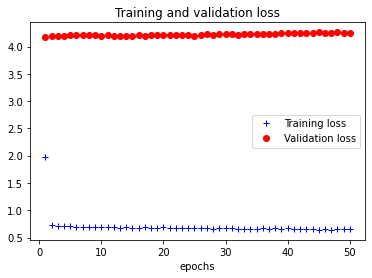

In [16]:
x = np.arange(0,epochs,1)
plt.plot(x+1, tl, "b+", label="Training loss")
plt.plot(x+1, vl, "ro", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [17]:

predict = []
p = []
device = "cuda" if torch.cuda.is_available() else "cpu"
model.eval()
for i in range(0,20*len(c)):
    x, y = test_data[i][0], test_data[i][1]
    x = x.reshape(1,3,100,100)
    x = torch.from_numpy(x)
    x = x.float()
    with torch.no_grad():
        pred = model(x.cuda()) if torch.cuda.is_available() else model(x)
        predicted, actual = pred[0].argmax(0), y 
        predicted = torch.Tensor.cpu(predicted)
        predict = np.append(predict, predicted)
        p = np.append(p, actual)


In [18]:
cm = confusion_matrix(p, predict)
print(cm)
np.savetxt("cm.csv", cm, delimiter=",")
score = round(accuracy_score(p, predict)*100,2)
print(f"Model Accuracy: {score}%")

[[12  8]
 [11  9]]
Model Accuracy: 52.5%
